# Experiment 1 analysis



In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Experiments

**TO DO**: describe experiment

In [66]:
# Data

# Experiments and summary
exp_description = {
    "1a": "genes-only",
    "1b": "genes+gaps",
    "1c": "genes-only__no-filters",
    "1d": "genes+gaps__no-filters"
}
summary_file_name = "summary_2.tsv"

exp_description_keys = list(exp_description.keys())
nb_exps = len(exp_description_keys)

# Creating a dataframe for each summary file
summary_dfs = {
    exp: pd.read_csv(os.path.join(f"EXP{exp}_{desc}", summary_file_name), sep="\t")
    for exp,desc in exp_description.items()
}

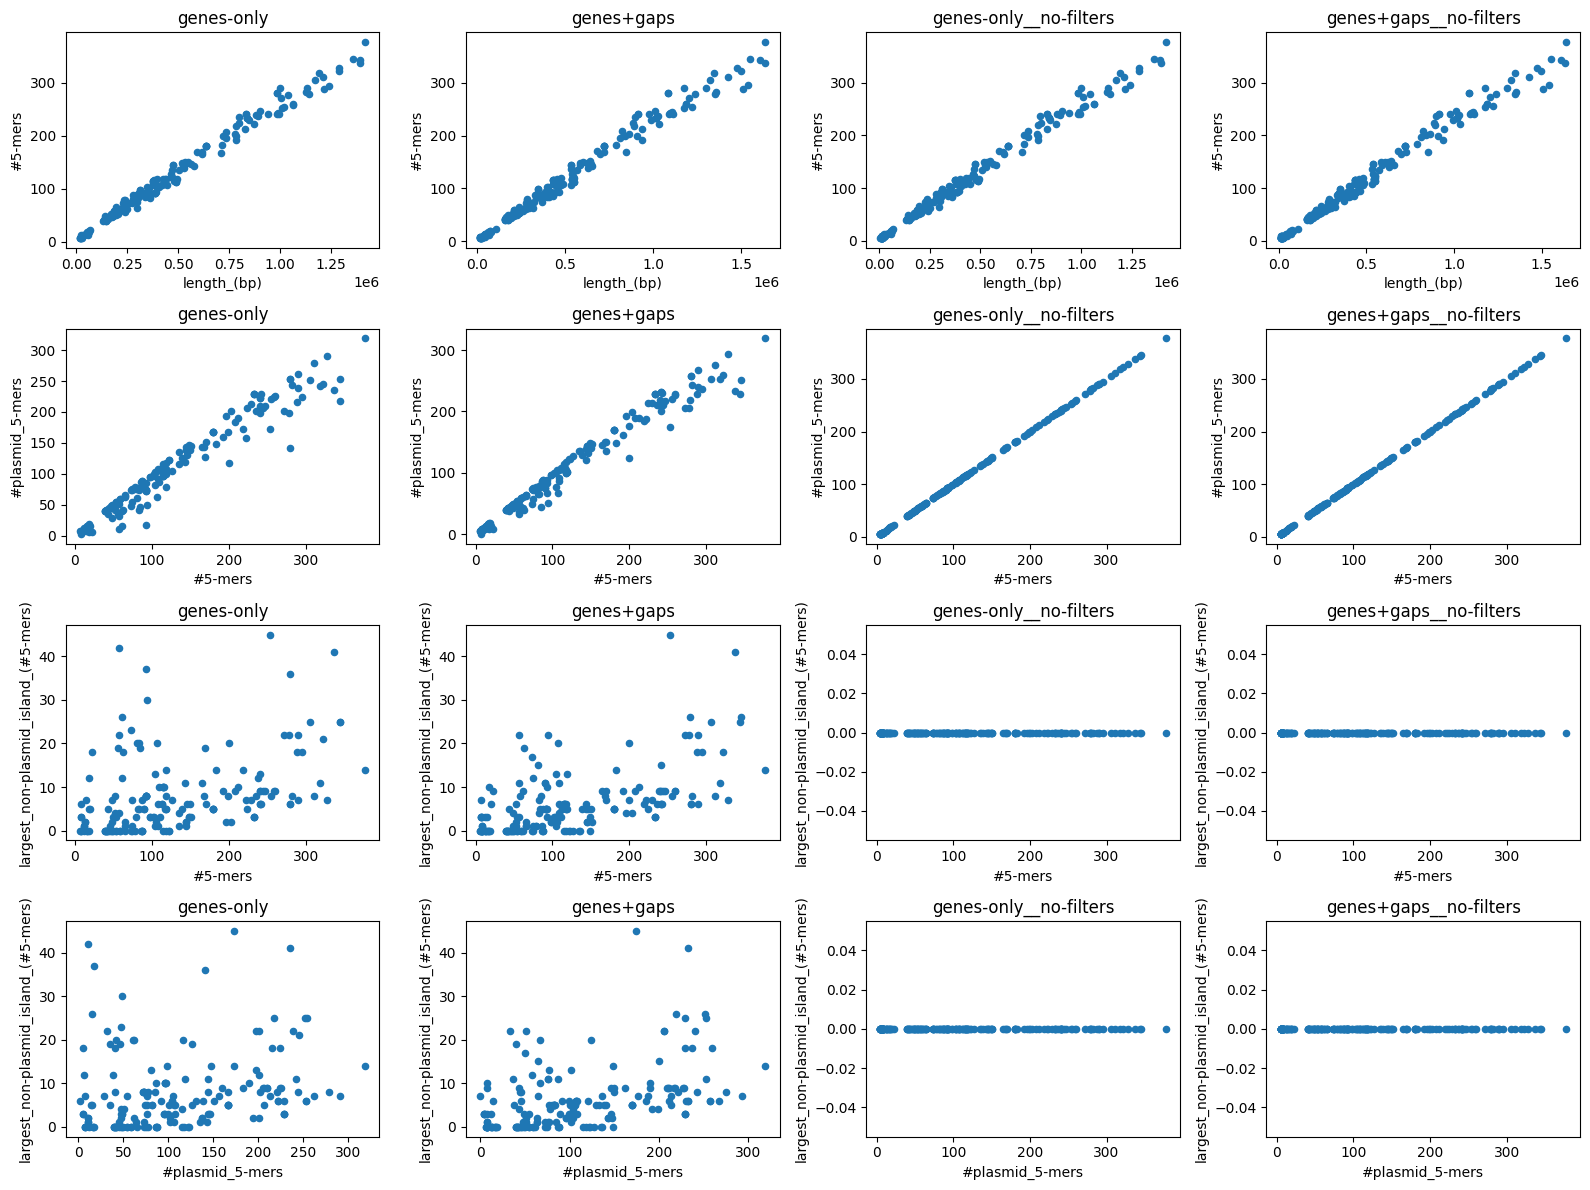

In [82]:
# Figure

desc_plots = [
    ["5-mers versus plasmid length", "length_(bp)", "#5-mers"],
    ["Plasmid 5-mers versus 5-mers", "#5-mers", "#plasmid_5-mers"],
    ["Max island versus 5-mers", "#5-mers", "largest_non-plasmid_island_(#5-mers)"],
    ["Max island versus plasmids 5-mers", "#plasmid_5-mers", "largest_non-plasmid_island_(#5-mers)"]
]
nb_plots = len(desc_plots)

fig1 = plt.figure(figsize=(nb_plots*4,nb_exps*3))

for i in range(nb_plots):
    x_col = desc_plots[i][1]
    y_col = desc_plots[i][2]
    for j in range(nb_exps):
        exp = exp_description_keys[j]
        ax = fig1.add_subplot(nb_plots,nb_exps,i*nb_plots+j+1)
        ax.set_title(exp_description[exp])
        summary_dfs[exp].plot.scatter(x_col, y_col, ax=ax)

plt.tight_layout()
plt.show()